In [1]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [7]:
path =r'/Users/ckuhn/Documents/DFO_Accuracy/data/Round2' # use your path=
allFiles = glob.glob(path + "/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df1 = pd.concat(list_)

In [8]:
path =r'/Users/ckuhn/Documents/DFO_Accuracy/data/' # use your path
allFiles = glob.glob(path + "/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df2 = pd.concat(list_)

In [9]:
stats1 = pd.melt(df1, id_vars=['Flood Algorithm','Flood ID'], var_name='Metric', value_name = 'Score')
stats2 = pd.melt(df2, id_vars=['Flood Algorithm','Flood ID'], var_name='Metric', value_name = 'Score')

In [16]:
stats1.groupby('Flood Algorithm').describe()

Flood ID                                                   \
                   count       mean       std  min  25%   50%   75%   max   
Flood Algorithm                                                             
MODIS              140.0  10.642857  5.760285  1.0  5.0  11.5  16.0  19.0   
MODIS_Otsu         140.0  10.642857  5.760285  1.0  5.0  11.5  16.0  19.0   

                 Score                                                \
                 count         mean          std       min       25%   
Flood Algorithm                                                        
MODIS            126.0  1527.357642  6140.215365  0.000000  0.824163   
MODIS_Otsu       126.0  1527.465503  6037.217824  0.039073  0.909892   

                                           
                      50%    75%      max  
Flood Algorithm                            
MODIS            0.975886  246.0  54125.0  
MODIS_Otsu       1.000000  474.5  52800.0

In [206]:
cmatrix1 = stats1.loc[stats1['Metric'].isin(['accuracy','tp', 'tn', 'fp', 'fn'])]
cmatrix1.groupby(['Metric', 'Flood Algorithm']).mean()

Flood ID         Score
Metric   Flood Algorithm                         
accuracy MODIS            10.642857      0.948096
         MODIS_Otsu       10.642857      0.900704
fn       MODIS            10.642857    384.714286
         MODIS_Otsu       10.642857    593.071429
fp       MODIS            10.642857    208.428571
         MODIS_Otsu       10.642857    422.071429
tn       MODIS            10.642857  11605.000000
         MODIS_Otsu       10.642857  11391.357143
tp       MODIS            10.642857   1544.857143
         MODIS_Otsu       10.642857   1336.500000

In [207]:
cmatrix2 = stats2.loc[stats2['Metric'].isin(['accuracy','tp', 'tn', 'fp', 'fn'])]
cmatrix2.groupby(['Metric', 'Flood Algorithm']).mean()

Flood ID         Score
Metric   Flood Algorithm                         
accuracy MODIS            10.642857      0.948096
         MODIS_Otsu       10.642857      0.921572
fn       MODIS            10.642857    384.714286
         MODIS_Otsu       10.642857    319.214286
fp       MODIS            10.642857    208.428571
         MODIS_Otsu       10.642857    461.142857
tn       MODIS            10.642857  11605.000000
         MODIS_Otsu       10.642857  11352.285714
tp       MODIS            10.642857   1544.857143
         MODIS_Otsu       10.642857   1610.357143

Adjusting the Otsu threshodls resulted in a 2% increase in overall accuracy from 90% to 92%, compared to a 94% overall accuracy of MODIS without Otsu. 

The adjustments eliminated 212 false negatives, reducing the number from 593 to 385. It increased the number of false positives by from 422 to 461 (39) and decreased the number of true negatives by 39 (from 11391 to 11352). The greatest difference was in the number of true positives, which left up by 274 counts from 1337 to 1610. 

So you have a decrease in false negatives and a increase in true positives offset by a smaller increase in false positives and a decrease in true negatives. This results in an overall 2% increase in accuracy. 

In [167]:
precRecall1 = stats1.loc[stats1['Metric'].isin(['accuracy','precision', 'recall', 'fMeasure'])]
precRecall1.groupby(['Metric', 'Flood Algorithm']).mean()

Flood ID     Score
Metric    Flood Algorithm                     
accuracy  MODIS            10.642857  0.948096
          MODIS_Otsu       10.642857  0.900704
fMeasure  MODIS            10.642857  0.740754
          MODIS_Otsu       10.642857  0.727316
precision MODIS            10.642857  0.774390
          MODIS_Otsu       10.642857  0.749322
recall    MODIS            10.642857  0.755538
          MODIS_Otsu       10.642857  0.812188

In [250]:
precRecall2 = stats2.loc[stats2['Metric'].isin(['accuracy','precision', 'recall', 'fMeasure'])]
precRecall2.groupby(['Metric', 'Flood Algorithm']).mean()

Flood ID     Score
Metric    Flood Algorithm                     
accuracy  MODIS            10.642857  0.948096
          MODIS_Otsu       10.642857  0.921572
fMeasure  MODIS            10.642857  0.740754
          MODIS_Otsu       10.642857  0.667023
precision MODIS            10.642857  0.774390
          MODIS_Otsu       10.642857  0.641568
recall    MODIS            10.642857  0.755538
          MODIS_Otsu       10.642857  0.793267

The Otsu adjustments decreased precision by 9% (from 75% to 64%) and decreased recall by 2% and decreased the fMeasure by 5. 

## Comparison Bar Plots

In [178]:
otsu1 = stats1.loc[stats1['Flood Algorithm'].isin(['MODIS_Otsu'])]
otsu2 = stats2.loc[stats2['Flood Algorithm'].isin(['MODIS_Otsu'])]

In [109]:
otsu1 = otsu1.loc[otsu1['Metric'].isin(['accuracy'])]
otsu2 = otsu2.loc[otsu2['Metric'].isin(['accuracy'])]
otsu1.head(1)

,Flood Algorithm,Flood ID,Metric,Score
29,MODIS_Otsu,1,accuracy,0.970215


In [110]:
joined = otsu1.merge(otsu2, how='left', left_index=True, right_index=True)
joined['Original Otsu'] = joined['Score_x']
joined['Updated Otsu'] = joined['Score_y']
joined['Metric'] = joined['Metric_y']
joined.head(3)

,Flood Algorithm_x,Flood ID_x,Metric_x,Score_x,Flood Algorithm_y,Flood ID_y,Metric_y,Score_y,Original Otsu,Updated Otsu,Metric
29,MODIS_Otsu,1,accuracy,0.970215,MODIS_Otsu,1,accuracy,0.834710,0.970215,0.834710,accuracy
31,MODIS_Otsu,10,accuracy,0.961505,MODIS_Otsu,10,accuracy,0.967993,0.961505,0.967993,accuracy
33,MODIS_Otsu,11,accuracy,0.860262,MODIS_Otsu,11,accuracy,0.850597,0.860262,0.850597,accuracy


In [111]:
joined = joined[['Metric'] + ['Original Otsu'] + ['Updated Otsu']]

In [208]:
cmatrix1 = cmatrix1.loc[cmatrix1['Flood Algorithm'].isin(['MODIS_Otsu'])]
cmatrix2 = cmatrix2.loc[cmatrix2['Flood Algorithm'].isin(['MODIS_Otsu'])]

In [236]:
tp1 = cmatrix1.loc[cmatrix1['Metric'].isin(['tp'])]
tp2 = cmatrix2.loc[cmatrix2['Metric'].isin(['tp'])]
joined_tp = tp1.merge(tp2, how='left',  on = 'Flood ID')
joined_tp['Original Otsu'] = joined_tp['Score_x']
joined_tp['Updated Otsu'] = joined_tp['Score_y']
joined_tp['Metric'] = joined_tp['Metric_y']
joined_tp = joined_tp[['Metric'] + ['Original Otsu'] + ['Updated Otsu'] + ['Flood ID']]
joined_tp['Difference'] = joined_tp['Original Otsu'] - joined_tp['Updated Otsu'] 
joined_tp = joined_tp.set_index(['Flood ID'])

tn1 = cmatrix1.loc[cmatrix1['Metric'].isin(['tn'])]
tn2 = cmatrix2.loc[cmatrix2['Metric'].isin(['tn'])]
joined_tn = tn1.merge(tn2, how='left',  on = 'Flood ID')
joined_tn['Original Otsu'] = joined_tn['Score_x']
joined_tn['Updated Otsu'] = joined_tn['Score_y']
joined_tn['Metric'] = joined_tn['Metric_y']
joined_tn = joined_tn[['Metric'] + ['Original Otsu'] + ['Updated Otsu']+ ['Flood ID']]
joined_tn['Difference'] = joined_tn['Original Otsu'] - joined_tn['Updated Otsu'] 
joined_tn = joined_tn.set_index(['Flood ID'])

fp1 = cmatrix1.loc[cmatrix1['Metric'].isin(['fp'])]
fp2 = cmatrix2.loc[cmatrix2['Metric'].isin(['fp'])]
joined_fp = fp1.merge(fp2, how='left',  on = 'Flood ID')
joined_fp['Original Otsu'] = joined_fp['Score_x']
joined_fp['Updated Otsu'] = joined_fp['Score_y']
joined_fp['Metric'] = joined_fp['Metric_y']
joined_fp = joined_fp[['Metric'] + ['Original Otsu'] + ['Updated Otsu']+ ['Flood ID']]
joined_fp['Difference'] = joined_fp['Original Otsu'] - joined_fp['Updated Otsu'] 
joined_fp = joined_fp.set_index(['Flood ID'])

fn1 = cmatrix1.loc[cmatrix1['Metric'].isin(['fn'])]
fn2 = cmatrix2.loc[cmatrix2['Metric'].isin(['fn'])]
joined_fn = fn1.merge(fn2, how='left', on='Flood ID')
joined_fn['Original Otsu'] = joined_fn['Score_x']
joined_fn['Updated Otsu'] = joined_fn['Score_y']
joined_fn['Metric'] = joined_fn['Metric_y']
joined_fn = joined_fn[['Metric'] + ['Original Otsu'] + ['Updated Otsu']+ ['Flood ID']]
joined_fn['Difference'] = joined_fn['Original Otsu'] - joined_fn['Updated Otsu'] 
joined_fn = joined_fn.set_index(['Flood ID'])

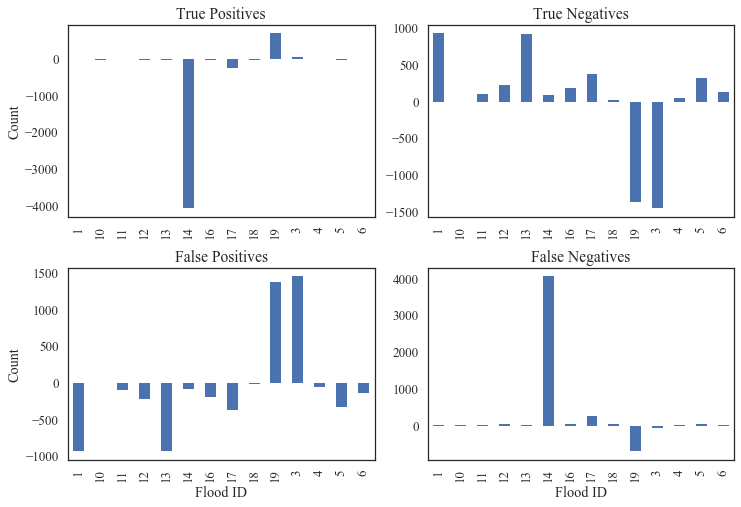

In [248]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

fig = plt.figure()
#plt.title('Change in Accuracy With Otsu Updates by Flood Event ID')

ax = fig.add_subplot(221)
joined_tp['Difference'].plot(kind = 'bar', ax = ax, sort_columns='Flood ID')
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set_title('True Positives')

ax = fig.add_subplot(222)
joined_tn['Difference'].plot(kind = 'bar', ax = ax, sort_columns='Flood ID')
ax.set_xlabel('')
ax.set_title('True Negatives')

ax = fig.add_subplot(223)
joined_fp['Difference'].plot(kind = 'bar', ax = ax, sort_columns='Flood ID')
ax.set_ylabel('Count')
ax.set_title('False Positives')

ax = fig.add_subplot(224)
joined_fn['Difference'].plot(kind = 'bar', ax = ax, sort_columns='Flood ID')
ax.set_title('False Negatives')

plt.tight_layout()


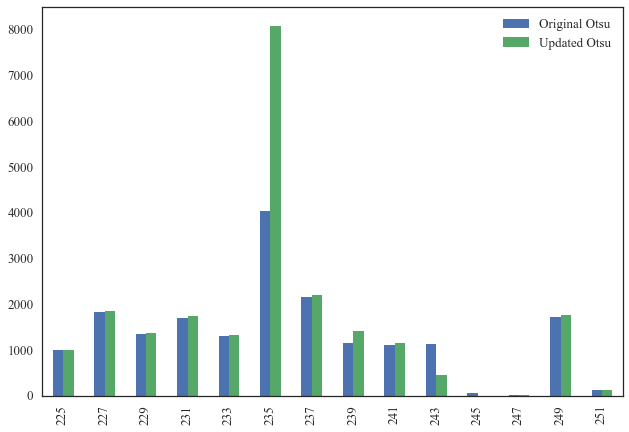

In [152]:
joined.plot(kind = 'bar')